## 01 – Exploratory Data Analysis (EDA)

### 1. Objective
The goal of this notebook is to:
- Understand the structure of the IEEE-CIS fraud detection dataset
- Explore class imbalance and key distributions
- Identify missing values and data quality issues
- Prepare the data for feature engineering


### 2. Datasets Used
This notebook uses the labeled training data only:
- `train_transaction.csv`
- `train_identity.csv`

The two datasets are merged using `TransactionID`.


### 3. Load Libraries
This section imports all required Python libraries for data analysis and visualization.


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Load Raw Data
- Load transaction and identity datasets separately
- Inspect shape, columns, and data types
- Verify presence of the fraud label (`isFraud`)


In [85]:
TRANSACTION_PATH = "../data/raw/train_transaction.csv"
IDENTITY_PATH = "../data/raw/train_identity.csv"

transaction_df = pd.read_csv(TRANSACTION_PATH)
identity_df = pd.read_csv(IDENTITY_PATH)

print("Transaction shape:", transaction_df.shape)
print("Identity shape:", identity_df.shape)

Transaction shape: (590540, 394)
Identity shape: (144233, 41)


### 5. Inspect Transaction Data
Review the structure, data types, and target label distribution in the transaction dataset.

In [86]:
transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


Text(0.5, 1.0, 'Distribution of Fraudulent vs Non-Fraudulent Transactions')

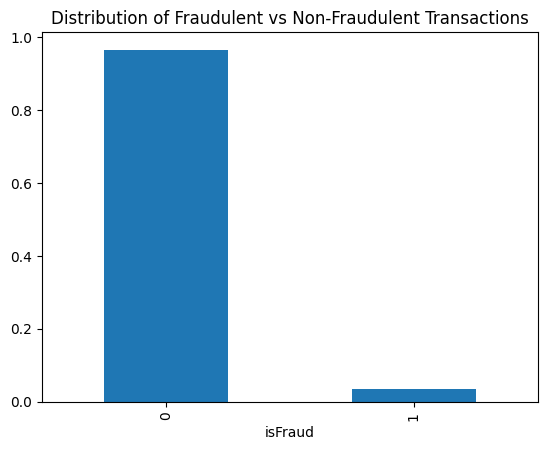

In [88]:
transaction_df['isFraud'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')

### 6. Inspect Identity Data
Review the structure and data quality of identity-related features.

In [89]:
identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [90]:
identity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

### 7. Merge Transaction and Identity Data
Merge transaction and identity datasets using `TransactionID` and validate the result.

In [91]:
df = transaction_df.merge(
    identity_df,
    on="TransactionID",
    how="left"
)

print("Merged shape:", df.shape)

Merged shape: (590540, 434)


### 8. Target Variable Analysis (`isFraud`)
Analyze the distribution and imbalance of fraudulent vs non-fraudulent transactions.

In [92]:
fraud_counts = df['isFraud'].value_counts()
fraud_rate = df['isFraud'].mean() * 100

print(fraud_counts)
print(f"Fraud Rate: {fraud_rate:.2f}%")

isFraud
0    569877
1     20663
Name: count, dtype: int64
Fraud Rate: 3.50%


### 9. Missing Value Analysis
Identify and quantify missing values across features.

In [93]:
missing_pct = (
    df.isnull()
    .mean()
    .sort_values(ascending=False)
    * 100
)

missing_pct.head(20)

id_24    99.196159
id_25    99.130965
id_07    99.127070
id_08    99.127070
id_21    99.126393
id_26    99.125715
id_27    99.124699
id_23    99.124699
id_22    99.124699
dist2    93.628374
D7       93.409930
id_18    92.360721
D13      89.509263
D14      89.469469
D12      89.041047
id_03    88.768923
id_04    88.768923
D6       87.606767
id_33    87.589494
id_10    87.312290
dtype: float64

### 10. Numerical Feature Analysis
Explore distributions and summary statistics for numerical features.

In [94]:
df.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04
card2,581607.0,3.625555e+02,1.577932e+02,100.000,214.000,361.000,512.00,6.000000e+02
card3,588975.0,1.531949e+02,1.133644e+01,100.000,150.000,150.000,150.00,2.310000e+02
card5,586281.0,1.992789e+02,4.124445e+01,100.000,166.000,226.000,226.00,2.370000e+02
addr1,524834.0,2.907338e+02,1.017411e+02,100.000,204.000,299.000,330.00,5.400000e+02
addr2,524834.0,8.680063e+01,2.690623e+00,10.000,87.000,87.000,87.00,1.020000e+02


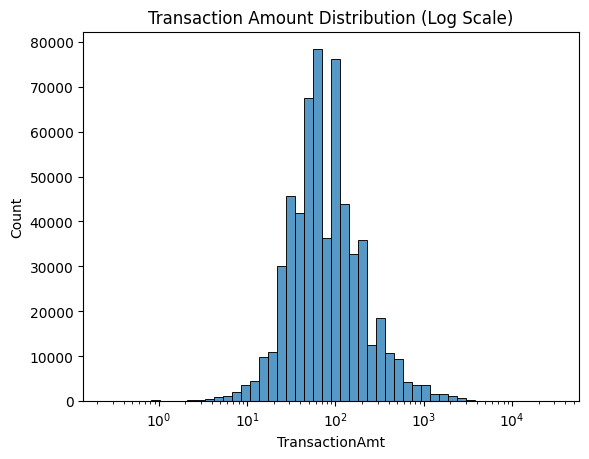

In [95]:
plt.figure()
sns.histplot(df['TransactionAmt'], bins=50, log_scale=True)
plt.title("Transaction Amount Distribution (Log Scale)")
plt.show()

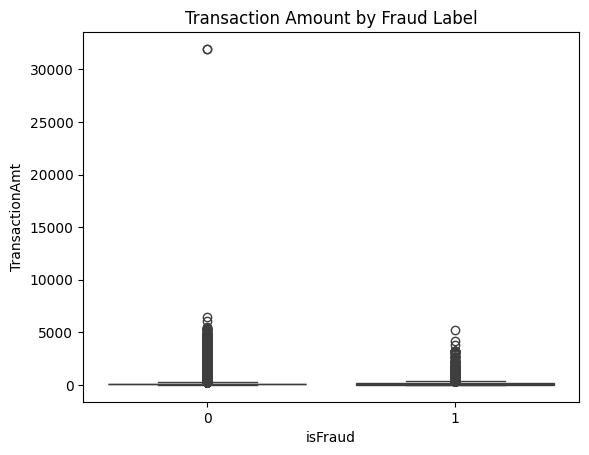

In [96]:
plt.figure()
sns.boxplot(x="isFraud", y="TransactionAmt", data=df)
plt.title("Transaction Amount by Fraud Label")
plt.show()

### 11. Categorical Feature Analysis
Inspect categorical features and their relationship with fraud

In [97]:
categorical_cols = df.select_dtypes(include=["object"]).columns
len(categorical_cols)

31

In [98]:
categorical_cols[:10]

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5'],
      dtype='object')

In [99]:
df["ProductCD"].value_counts()

ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64

In [100]:
df.groupby("ProductCD")["isFraud"].mean().sort_values(ascending=False)

ProductCD
C    0.116873
S    0.058996
H    0.047662
R    0.037826
W    0.020399
Name: isFraud, dtype: float64

## 12. Correlation Analysis
Evaluate correlations between numerical features and the fraud label.

In [101]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

corr_with_target = (
    df[numeric_cols]
    .corr()["isFraud"]
    .sort_values(ascending=False)
)

corr_with_target.head(15)

isFraud    1.000000
V257       0.383060
V246       0.366878
V244       0.364129
V242       0.360590
V201       0.328005
V200       0.318783
V189       0.308219
V188       0.303582
V258       0.297151
V45        0.281832
V158       0.278066
V156       0.275952
V149       0.273282
V228       0.268861
Name: isFraud, dtype: float64

### Time-Based Analysis
Explore temporal patterns in transactions and fraud occurrences using `TransactionDT`.

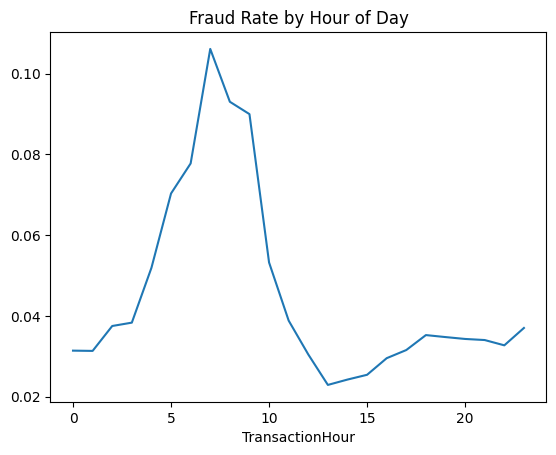

In [102]:
df["TransactionHour"] = (df["TransactionDT"] // 3600) % 24

df.groupby("TransactionHour")["isFraud"].mean().plot(
    title="Fraud Rate by Hour of Day"
)
plt.show()

### Missingness vs Fraud
Analyze whether missing values themselves are predictive of fraud.

In [103]:
sample_cols = missing_pct.head(10).index

for col in sample_cols:
    rate = df.groupby(df[col].isnull())["isFraud"].mean()
    print(f"{col}:\n{rate}\n")

id_24:
id_24
False    0.084685
True     0.034587
Name: isFraud, dtype: float64

id_25:
id_25
False    0.081255
True     0.034584
Name: isFraud, dtype: float64

id_07:
id_07
False    0.082638
True     0.034570
Name: isFraud, dtype: float64

id_08:
id_08
False    0.082638
True     0.034570
Name: isFraud, dtype: float64

id_21:
id_21
False    0.082574
True     0.034571
Name: isFraud, dtype: float64

id_26:
id_26
False    0.082316
True     0.034573
Name: isFraud, dtype: float64

id_27:
id_27
False    0.082414
True     0.034571
Name: isFraud, dtype: float64

id_23:
id_23
False    0.082414
True     0.034571
Name: isFraud, dtype: float64

id_22:
id_22
False    0.082414
True     0.034571
Name: isFraud, dtype: float64

dist2:
dist2
False    0.099158
True     0.030623
Name: isFraud, dtype: float64



### Top Features Correlated with Fraud
Visualize the most correlated numerical features with the target variable.

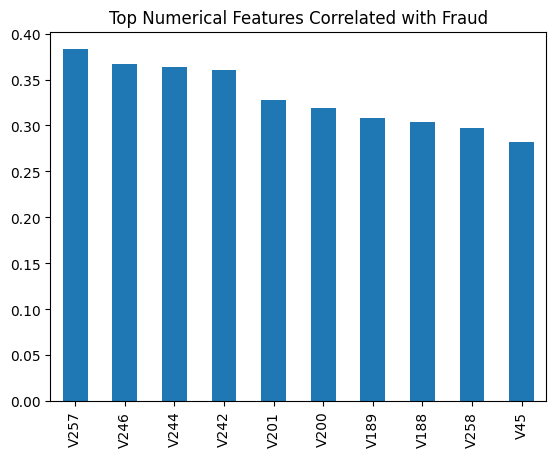

In [104]:
corr_with_target.drop("isFraud").head(10).plot(
    kind="bar",
    title="Top Numerical Features Correlated with Fraud"
)
plt.show()

## 13. Save Processed Dataset
Save the merged dataset for downstream feature engineering and modeling.

In [105]:
OUTPUT_PATH = "../data/processed/merged_train.csv"
df.to_csv(OUTPUT_PATH, index=False)

print("Merged dataset saved to:", OUTPUT_PATH)

Merged dataset saved to: ../data/processed/merged_train.csv
